In [1]:
#instalando dependencia
pip install nltk

In [4]:
pip install Unidecode

     |████████████████████████████████| 245kB 3.0MB/s 


In [6]:
# Data Structures
import numpy  as np
import pandas as pd

import json

# Corpus Processing
import re
import nltk.corpus
import nltk
from unidecode                        import unidecode
nltk.download('stopwords')
import nltk
nltk.download('punkt')

from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.feature_extraction       import DictVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:

#importando dados

#uri = "https://raw.githubusercontent.com/RenatoGalindo/K-means-acur-cia/master/pergunta.csv"
 #uri  = "https://raw.githubusercontent.com/RenatoGalindo/K-means-acur-cia/master/Pergunta2.csv"
 uri  = "/content/3. Amostra_CampoPerguntaAposTratamento_New.csv"
data = pd.read_csv(uri ,error_bad_lines=False )
data.columns = map(str.lower, data.columns)
#printando pegando as 110 primeiras linhas
data.head(110 )





,pergunta
0,Como fazer alteração do limite operacional de ...
1,Quais são as coberturas de Seguro Auto?
2,cancelar seguro protegido cheque especial
3,solicitação de estorno de seguro cartão protegido
4,Endosso do seguro do carro?
...,...
105,cancelamento de seguro cheque protegido
106,envio de seguro
107,cpf em outro vinculado
108,dá para fazer transferencia de investimentos e...


In [10]:
#pegando a clouna pergunta
corpus = data['pergunta'].tolist()
#imprindo as colunas
print(corpus)

['Como fazer alteração do limite operacional de cambio do cliente?', 'Quais são as coberturas de Seguro Auto?', 'cancelar seguro protegido cheque especial', 'solicitação de estorno de seguro cartão protegido', 'Endosso do seguro do carro?', 'para cadastrar o cliente pessoa juridica para operar com cambio ', 'pode usar para mais de um cpf o mesmo celular', 'CLIENTE ATRASANDO UM MÊS DE SEGURO FICA INATIVO ?', 'CARENCIA MORTE NATURAL SEGURO DE VIDA ', 'como faz para autorizar seguro no internet banking', 'enviar ordem de cambio', 'como fazer alteração de seguro patrimonial ? ', 'passo a passo envio de cambio pelo app', 'carencia seguro vida ', 'COMO REALIZAR O ENDOSSO DE UM SEGURO ', 'COMO CONSULTAR A LIBERACAO DE ORDEM DE PAGAMENTO DE CAMBIO', 'como consultar seguro cartao', 'preciso imprimir proposta de seguro ', 'recebimento de cambio fechamento', 'como abrir chamado para seguro ?', 'Quais são os benefícios da Assistência 24 Horas do Seguro Auto?', 'como efetuo o vinculo do cartão adic

In [0]:


# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [0]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)


    
    for document in corpus:

        index = corpus.index(document)
        
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www
       
       
        listOfTokens = word_tokenize(corpus[index])
      
 
        twoLetterWord = twoLetters(listOfTokens)
        listOfTokens = removeWords(listOfTokens, stopwords)
      
       
        
        
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        #listOfTokens = applyStemming(listOfTokens, param_stemmer)
        
        corpus[index]   = " ".join(listOfTokens)
     
        
        corpus[index] = unidecode(corpus[index])
       

        

    return corpus

In [13]:
print(corpus)

['Como fazer alteração do limite operacional de cambio do cliente?', 'Quais são as coberturas de Seguro Auto?', 'cancelar seguro protegido cheque especial', 'solicitação de estorno de seguro cartão protegido', 'Endosso do seguro do carro?', 'para cadastrar o cliente pessoa juridica para operar com cambio ', 'pode usar para mais de um cpf o mesmo celular', 'CLIENTE ATRASANDO UM MÊS DE SEGURO FICA INATIVO ?', 'CARENCIA MORTE NATURAL SEGURO DE VIDA ', 'como faz para autorizar seguro no internet banking', 'enviar ordem de cambio', 'como fazer alteração de seguro patrimonial ? ', 'passo a passo envio de cambio pelo app', 'carencia seguro vida ', 'COMO REALIZAR O ENDOSSO DE UM SEGURO ', 'COMO CONSULTAR A LIBERACAO DE ORDEM DE PAGAMENTO DE CAMBIO', 'como consultar seguro cartao', 'preciso imprimir proposta de seguro ', 'recebimento de cambio fechamento', 'como abrir chamado para seguro ?', 'Quais são os benefícios da Assistência 24 Horas do Seguro Auto?', 'como efetuo o vinculo do cartão adic

In [14]:
language = 'portuguese'

corpus = processCorpus(corpus, language)

print(corpus)


['fazer alteracao limite operacional cambio cliente', 'quais coberturas seguro auto', 'cancelar seguro protegido cheque especial', 'solicitacao estorno seguro cartao protegido', 'endosso seguro carro', 'cadastrar cliente pessoa juridica operar cambio', 'pode usar cpf celular', 'cliente atrasando mes seguro fica inativo', 'carencia morte natural seguro vida', 'faz autorizar seguro internet banking', 'enviar ordem cambio', 'fazer alteracao seguro patrimonial', 'passo passo envio cambio app', 'carencia seguro vida', 'realizar endosso seguro', 'consultar liberacao ordem pagamento cambio', 'consultar seguro cartao', 'preciso imprimir proposta seguro', 'recebimento cambio fechamento', 'abrir chamado seguro', 'quais beneficios assistencia horas seguro auto', 'efetuo vinculo cartao adicional cpf cliente', 'seguro indevido contestar', 'cancelamento seguro debitado', 'valor maximo valor segurado seguro', 'alteracao dependente seguro', 'abrir chamado sobre seguro nao debitado', 'solicitar segunda

In [15]:

#vectorizer = TfidfVectorizer(sublinear_tf=True)

stopwords = nltk.corpus.stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
final_df = tf_idf
final_df.T.nlargest(5, 0)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519
operacional,0.614926,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
limite,0.437937,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alteracao,0.414764,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.620787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.600587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.629931,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fazer,0.335757,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.502536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.588948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cliente,0.312899,0.0,0.0,0.0,0.0,0.312392,0.0,0.251788,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280778,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.323037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)
final_df

,abertura,abrir,acabamos,acatado,aceitavel,acerto,acessar,acho,acidenctes,acidente,acidentes,acima,acionamento,acionar,aciono,aconteceu,acumulado,acumulo,aderiu,adesao,adicionais,adicional,aditamento,adquirencia,adquirir,afalbetizado,agencia,agendado,agendamento,agendar,agentes,agricola,ainda,albert,algum,alienando,aliquota,allianz,altearacao,alteracao,...,ultimos,unificada,usar,uso,utilizacao,utilizar,utilziar,valer,validade,valor,valores,varios,veiculo,veiculos,vejo,vence,vencimento,venda,ver,verde,verificar,vezes,via,viagem,viagens,viajante,vida,vidros,vigencia,vigente,vinculado,vincular,vinculo,vindo,visa,vistoria,vlr,vou,zurich,zurick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:

def run_KMeans(max_k, data):

    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )

        
    return kmeans_results

In [0]:

def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        


In [0]:

# Running Kmeans
k = 80
kmeans_results = run_KMeans(k, final_df)



In [0]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    
    teste = {}
    for label in labels:

        id_temp = np.where(prediction==label) # indices for each cluster
        
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        
       
        best_features = [(features[i], x_means[i]) for i in sorted_means]
      
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
     
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

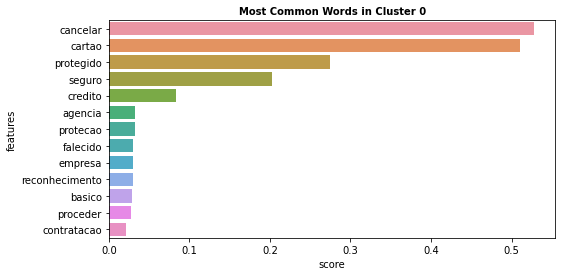

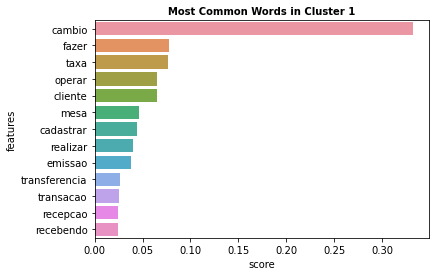

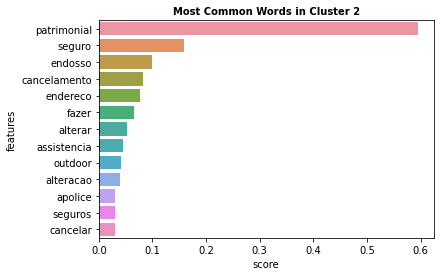

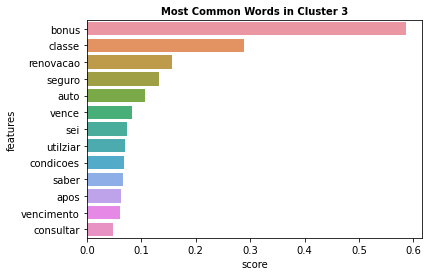

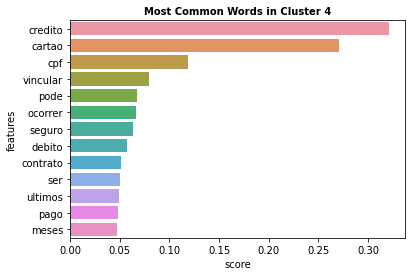

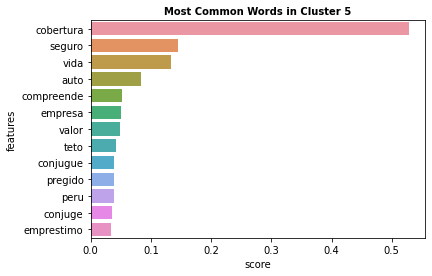

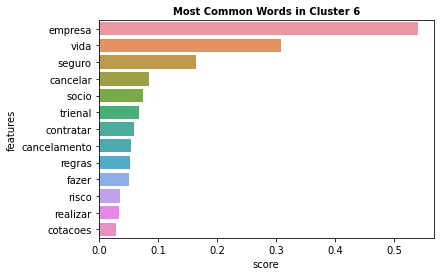

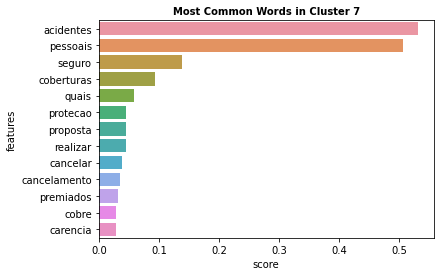

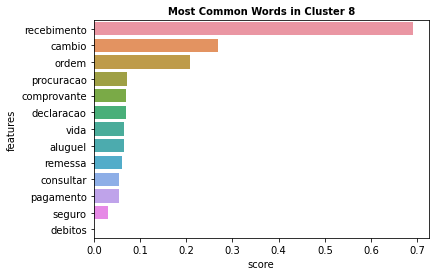

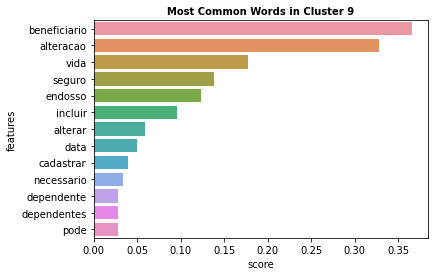

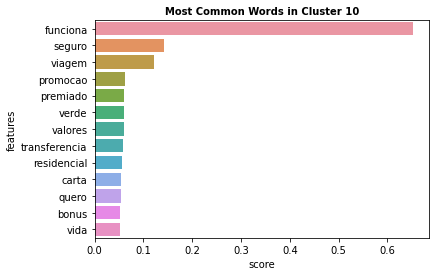

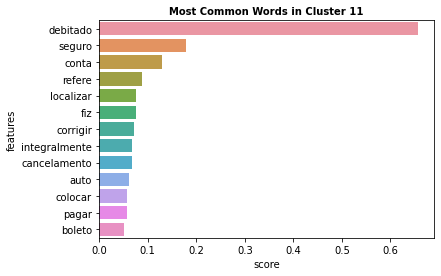

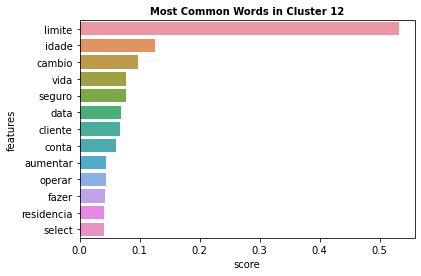

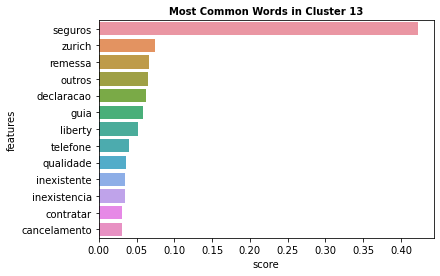

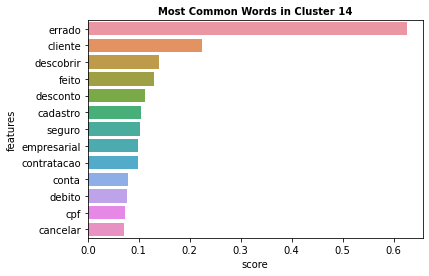

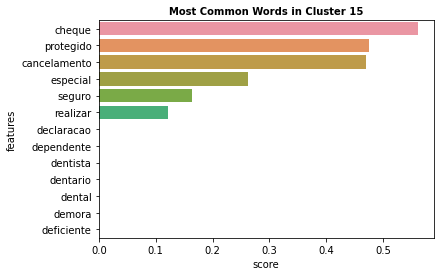

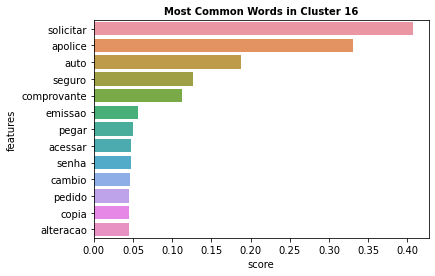

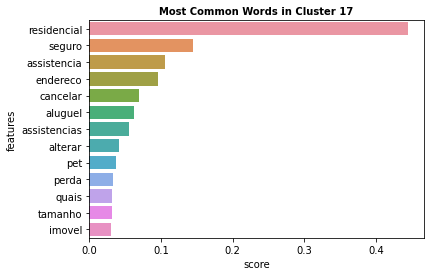

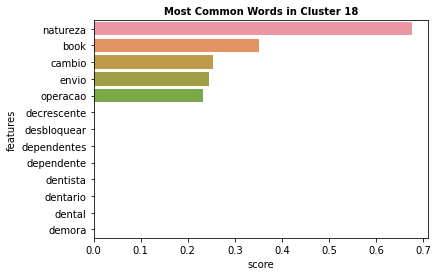

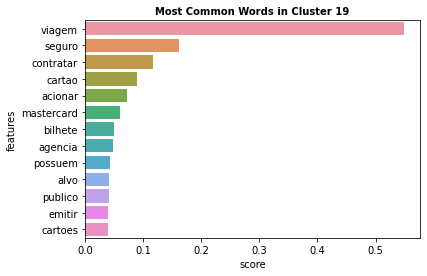

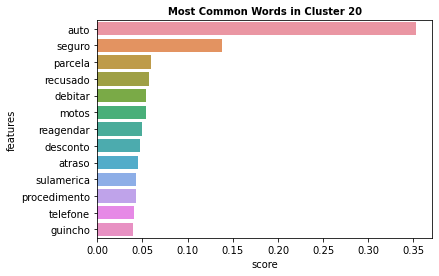

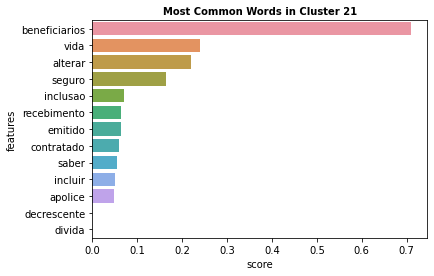

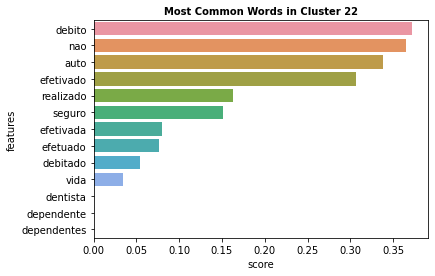

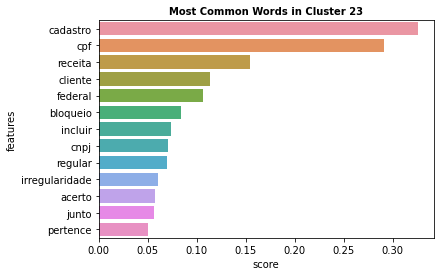

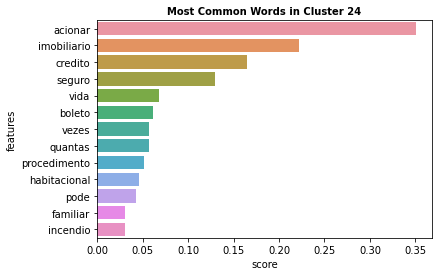

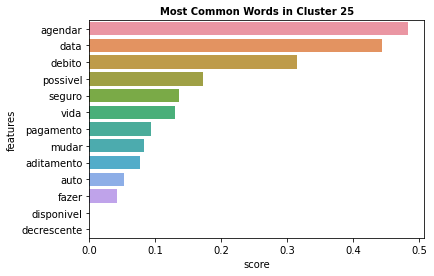

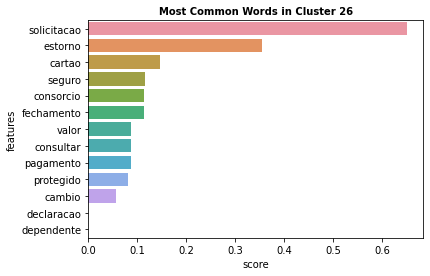

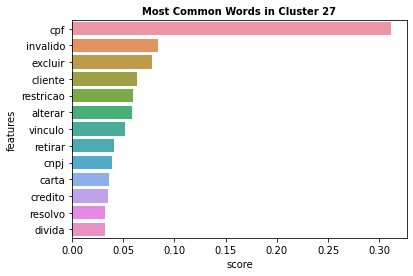

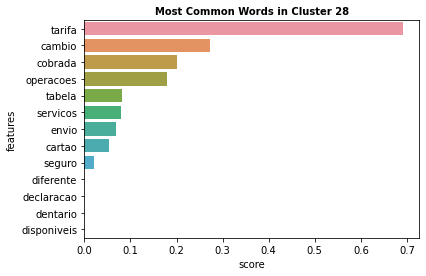

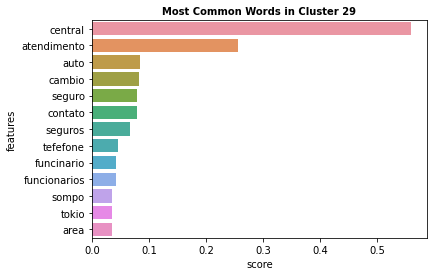

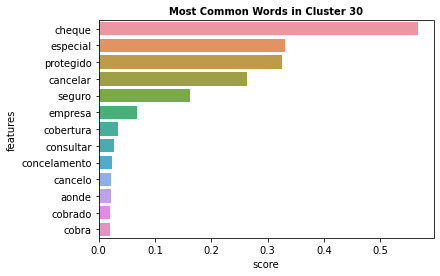

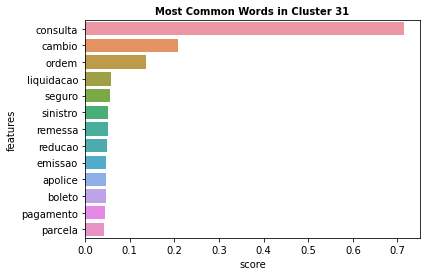

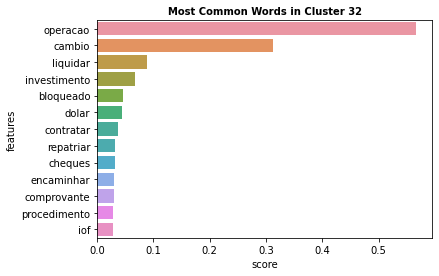

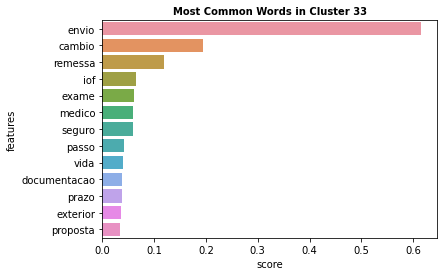

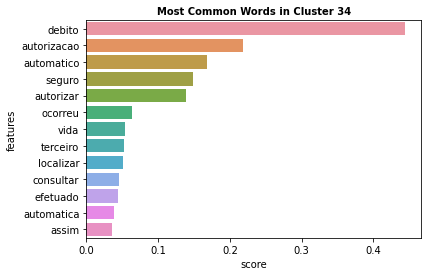

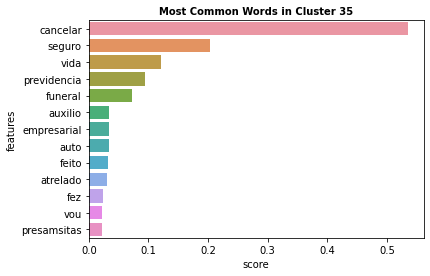

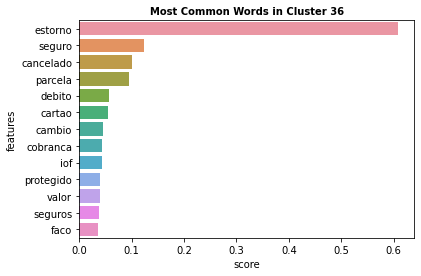

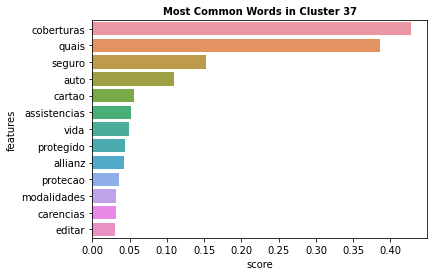

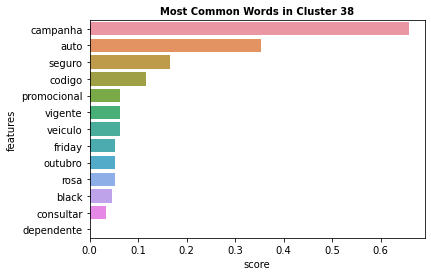

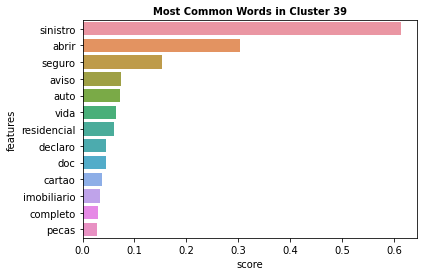

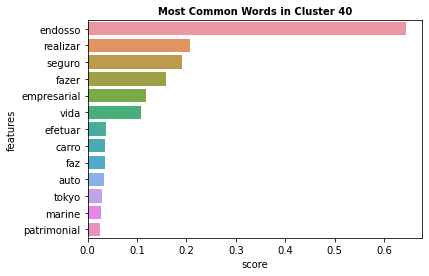

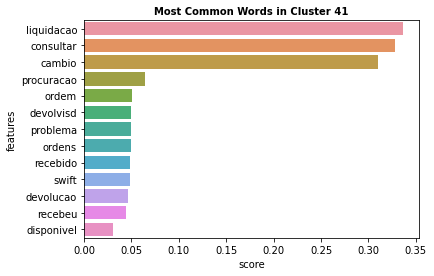

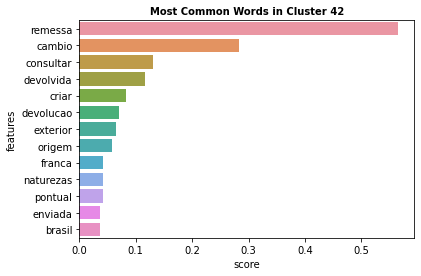

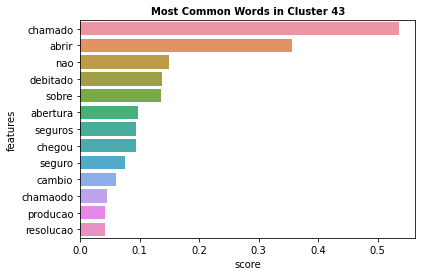

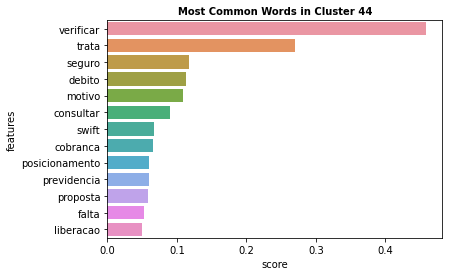

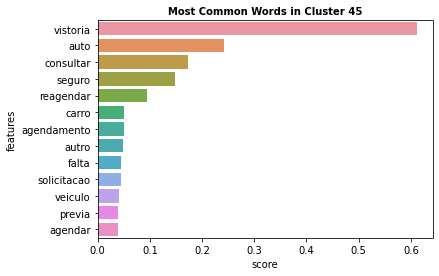

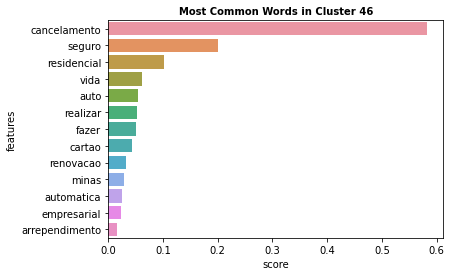

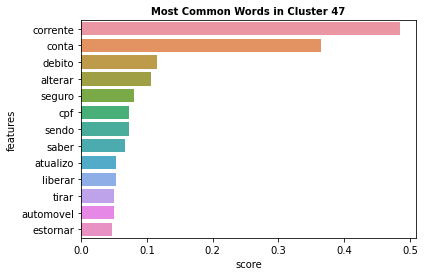

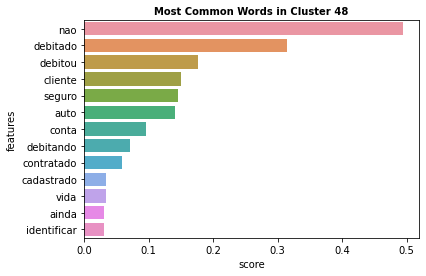

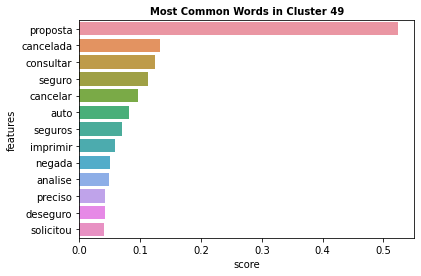

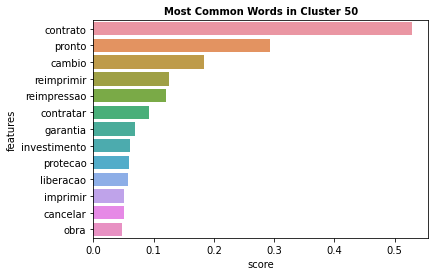

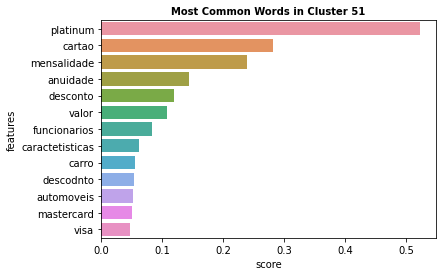

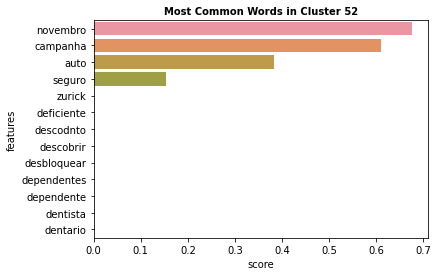

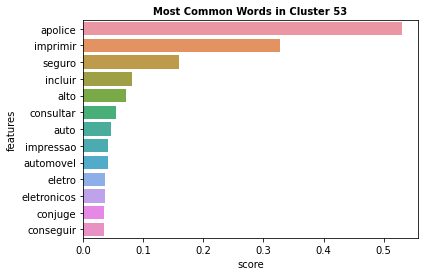

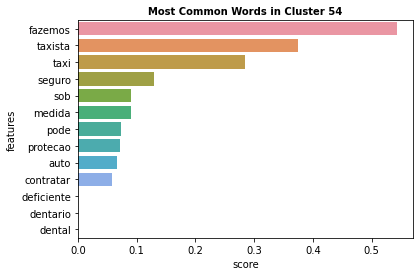

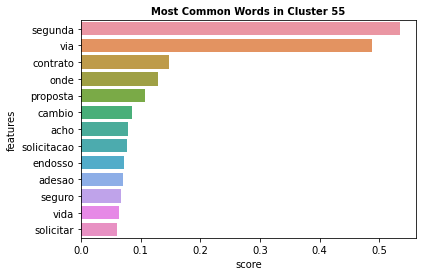

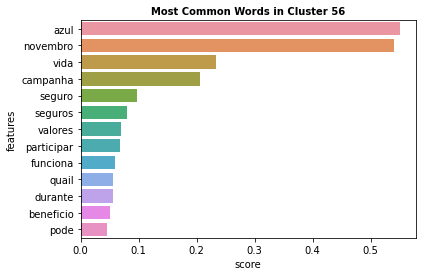

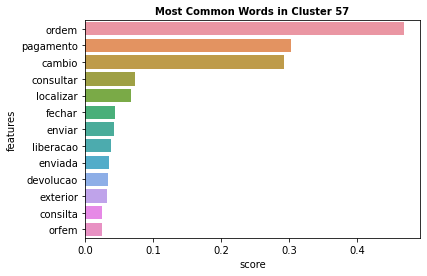

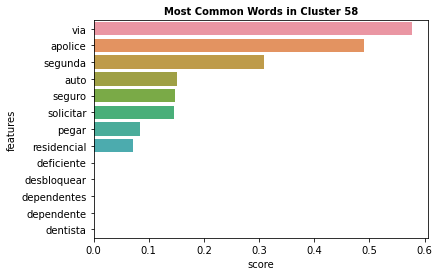

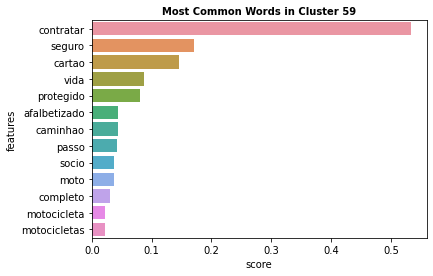

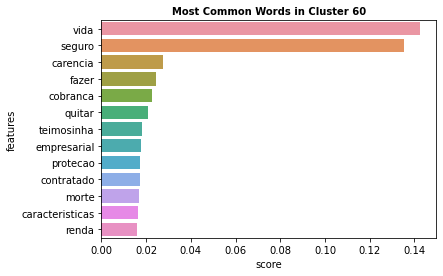

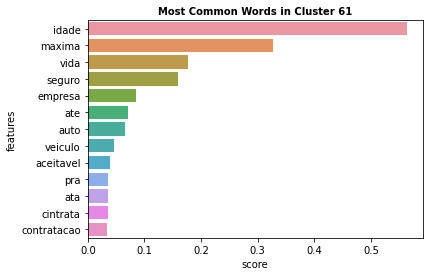

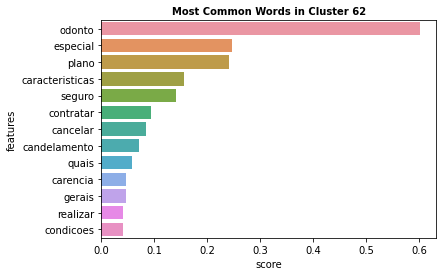

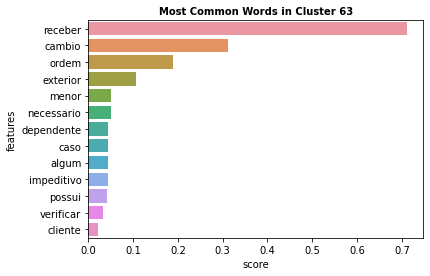

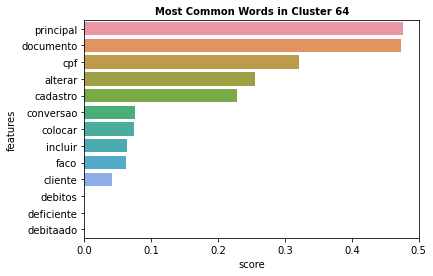

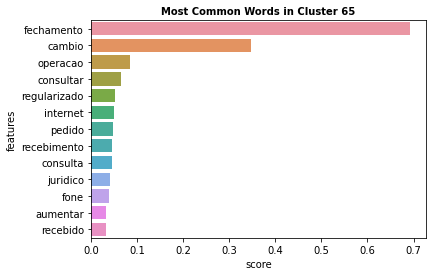

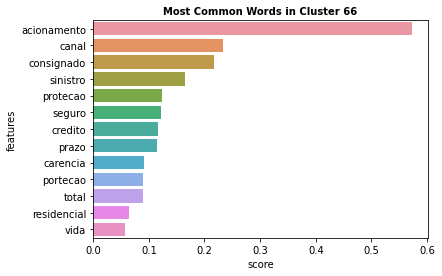

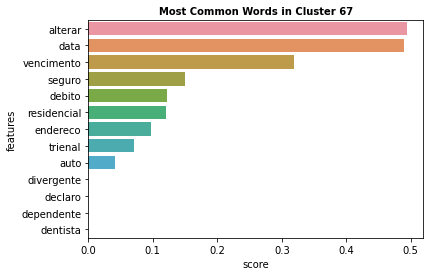

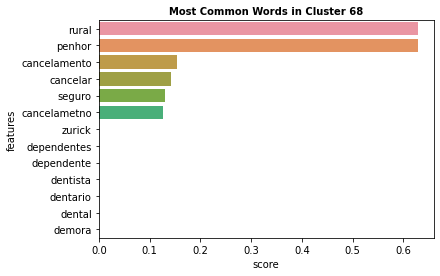

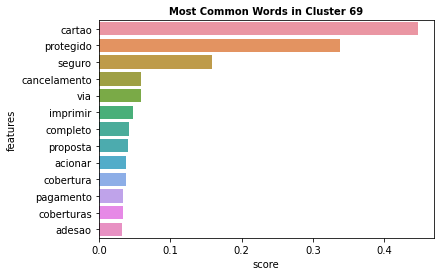

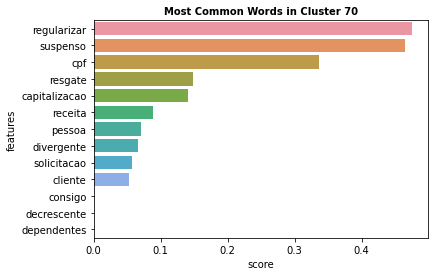

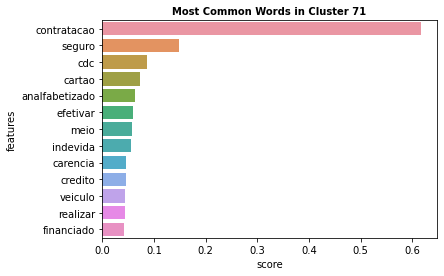

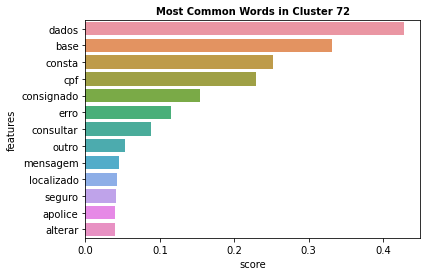

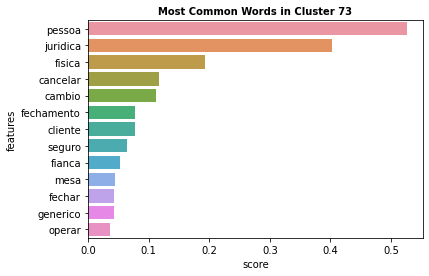

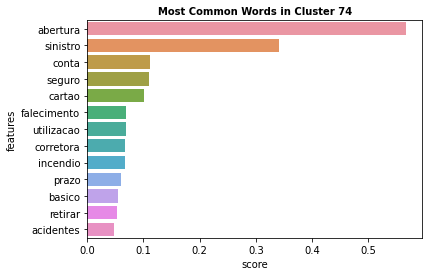

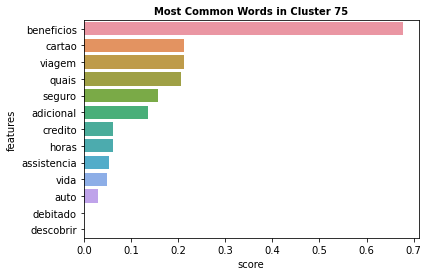

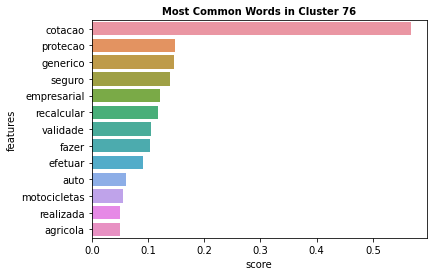

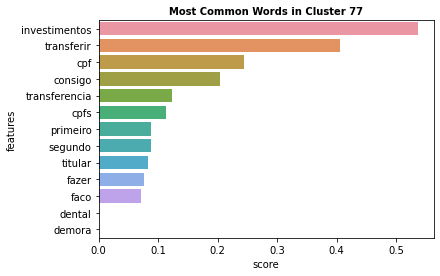

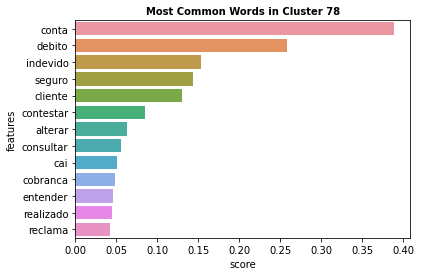

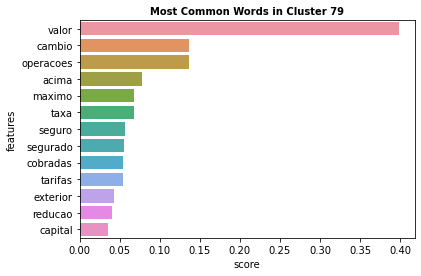

In [0]:
best_result = 80
kmeans = kmeans_results.get(best_result)


final_df_array = final_df.to_numpy()

prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
#muda a contidade palavras no grafico
plotWords(dfs, 13)

In [0]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=200, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

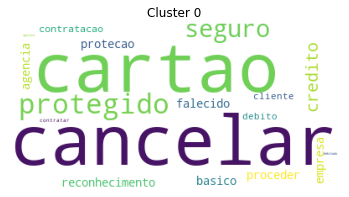

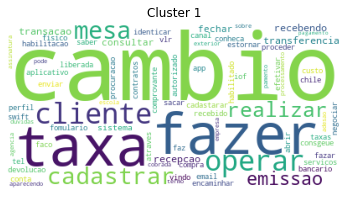

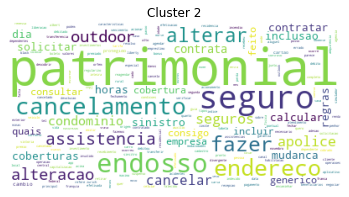

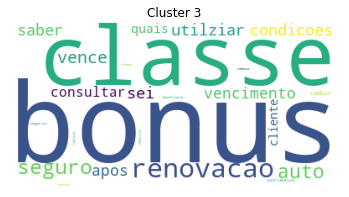

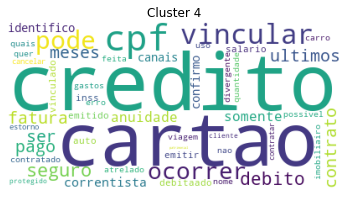

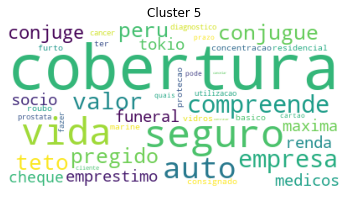

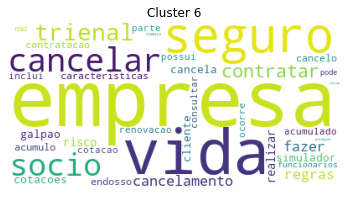

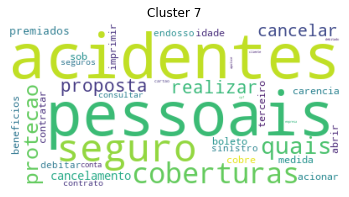

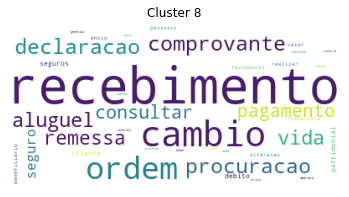

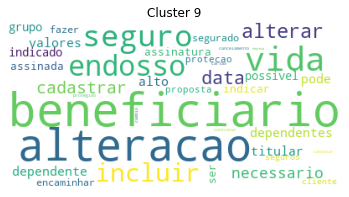

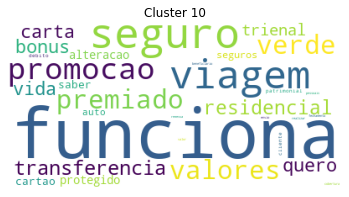

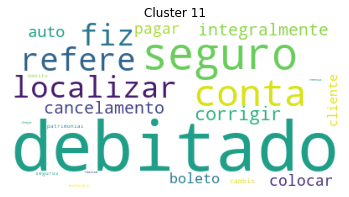

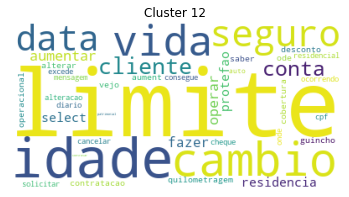

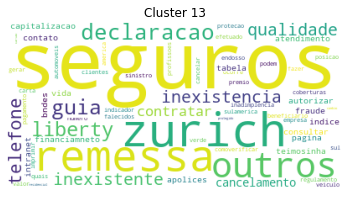

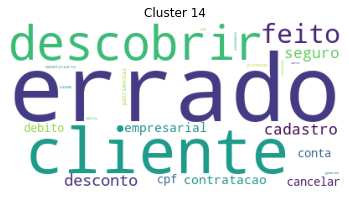

ZeroDivisionError: ignored

In [0]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

centroids.columns = final_df.columns
generateWordClouds(centroids)


In [0]:
final_df.columns

Index(['abertura', 'abrir', 'acabamos', 'acatado', 'aceitavel', 'acerto',
       'acessar', 'acho', 'acidenctes', 'acidente',
       ...
       'vinculado', 'vincular', 'vinculo', 'vindo', 'visa', 'vistoria', 'vlr',
       'vou', 'zurich', 'zurick'],
      dtype='object', length=837)